# Otimização de hiperparâmetros
![head](https://drive.google.com/uc?id=1E0NK-xpj28zAccdWf5-4bLRoa30jlmZ8)

O que são hiperparâmetros e como otimizá-los? Por que se preocupar com isso? Em que etapa de um projeto de DS isso entra? Na aula de hoje, vamos falar sobre esses tópicos. <br>

## Motivação


<figure>
<center>
<img src= 'https://drive.google.com/uc?id=1EmBb4OkO3WsQMtorvA9TqZLocXI8Y3Ll' />
</center>
</figure>


Digamos que você esteja fazendo um projeto ponta a ponta de Ciência de Dados. Você passou muito tempo coletando e limpando os dados, depois analisou eles, tirou insights importantes e finalmente começou a modelar com Machine Learning.

Olhando para alguma métrica, como acurácia ou R², você viu que seu modelo está razoável - dá para melhorar. Assim, você decide preparar ainda mais os dados para a modelagem, o que dá um up no modelo, mas ainda fica uma sensação de que dava para fazer melhor.

 E agora?

Agora entra a otimização de hiperparâmetros.


## Parâmetros vs. Hiperparâmetros 


In [0]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston

lasso = Lasso(alpha = 1.0,    #-----------------------> alpha e tol: 
              tol = 0.0001)   #-----------------------> são hiperparâmetros

lasso.fit(load_boston().data,load_boston().target)
coefs = lasso.coef_  #--------------------------------> Os coeficientes são parâmetros

<figure>
<center>
<img src= 'https://drive.google.com/uc?id=1C_HMnvOT-ZfWLlYBS0Rmgh1UOMYQEdZd' />
</center>
</figure>

Parâmetros e hiperparâmetros são duas partes fundamentais de um modelo preditivo. Em um algoritmo machine learning, os **parâmetros são ajustados diretamente pelo processo de aprendizado**, automaticamente. Os coeficientes de uma regressão linear, os pesos de uma rede neural, as fronteiras das vizinhanças no kNN, todos esses são parâmetros que se ajustam ao treinar o modelo preditivo para um conjunto de dados.<br>

Por sua vez, **hiperparâmetros são variáveis do algoritmo definidas antes do treinamento**. Eles representam características mais construtivas, como a taxa de aprendizado de uma regressão linear, o número de neurônios e camadas de uma rede neural, o número de vizinhos do kNN. Os hiperparâmetros são muito importantes para a performance do modelo preditivo e caso escolhidos de qualquer jeito, podem torná-lo inútil.   <br>

Do mesmo jeito que os parâmetros de um algoritmo são ajustados de forma a minimizar ou maximizar uma métrica, os hiperparâmetros também são. O problema é que só é possível medir a performance de de uma combinação de hiperparâmetros treinando o modelo em questão. Assim, **para otimizar um hiperparâmetro é preciso treinar um modelo diversas vezes**, o que é muito demorado. Mas, isso não significa que não existam jeitos mais inteligentes de fazer essa- para isso existem diversos algoritmos que vamos falar a seguir.

## Ajustando hiperparâmetros

Vamos ver os algoritmos mais populares de otimização de hiperparâmetros. Para compará-los, vamos à prática utilizando um modelo preditivo e um conjunto de dados.


### O modelo preditivo

 Vamos usar uma **[Árvore de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**, um modelo preditivo que formula comparações e desigualdades sobre os dados de entrada, para predizer uma variável de saída. Um ótimo aspecto desse modelo é que fácil de interpretá-lo, como na imagem a seguir:<br>


<figure>
<center>
<img src= 'https://drive.google.com/uc?export=view&id=1mJbylXNgp2uUaVbGmzQ_pz5zs1KCE4Ge' />
</center>
</figure>
Um hiperparâmetro muito importante para uma árvore de decisão é sua profundidade máxima, ou seja, o número de perguntas que podem ser feitas em sequência, pois ele ajuda muito a prevenir um problema comum deste modelo que é o sobreajuste.



### O conjunto de dados


Em relação aos dados, vamos usar o [dataset de câncer de mama](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset), onde devemos classificar se um nódulo é maligno ou benigno com base em características dele, extraídas de uma imagem digitalizada de um tecido mamário (via PAAF - Punção Aspirativa de Agulha Fina).

### Preparação

Como neste caso é muito importante detectar os casos de câncer e evitar um alarme falso, precisamos prestar atenção tanto na taxa de positivos verdadeiros quando na de falsos positivos. Assim, a métrica de avaliação que vamos utilizar é o **AUC-ROC**, ou área sob a curva [ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic), que representa a probabilidade do modelo distinguir corretamente a classe positiva da negativa. O melhor caso da AUC-ROC ocorre em 1 e o pior caso ocorre em 0.5 (por quê?). <br>

$$TPR = \frac{TP}{TP + FN} \quad \quad FPR = \frac{FP}{FP + TN}$$

<figure>
<center>
<img src= 'https://drive.google.com/uc?id=13UEKTB9S4DHGH3OUD5YmLZiJQWFZz_hB' />
</center>
</figure>

Além disso, vamos repartir o conjunto de dados diversas vezes entre partes de  treino e partes de teste para garantir que o modelo performa bem em todo o conjunto - essa técnica é chamada de validação cruzada, ou **[cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)**. Vamos usar essa estratégia para todos os algoritmos a seguir, também!

<figure>
<center>
<img src= 'https://drive.google.com/uc?id=1zEQLIDI1-z2OxG6EzkihrDuxJ7OK1dHT' />
</center>
</figure>

In [0]:
# Importando o que precisamos
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

Vamos medir o quão bem a árvore de decisão performa sem realizar nenhum ajuste:

In [0]:
# Carregando o conjunto de dados
entradas, saida = load_breast_cancer(return_X_y=True)

# Vamos passar o modelo preditivo, os dados de entrada e saida, a funcao de desempenho e o numero de particoes para a funcao de 
# validacao cruzada
desempenho_cross_val = cross_val_score(estimator = DecisionTreeClassifier(random_state=37),
                                       X = entradas, 
                                       y = saida,
                                       scoring = 'roc_auc',
                                       cv = 3)

print('Desempenho médio de AUC-ROC: {}'.format(round(desempenho_cross_val.mean(),3)))

Desempenho médio de AUC-ROC: 0.916


Aparentemente já conseguimos um bom resultado mesmo sem otimizar o hiperparâmetro. Isso é razoavelmente comum, mas estamos diagnosticando casos de câncer, então cada pontinho vale! Então, vamos às técnicas de otimização de hiperparâmetros:

### 1. Grid Search


<figure>
<center>
<img src= 'https://drive.google.com/uc?id=18YG8avvFrHWU8AoXXSChil9JrPcCDCJe'width="600" height="280"/>
</center>
</figure>

Possivelmente o caso mais ingênuo e mais simples. **O [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), ou busca em grade, é um algoritmo de busca que recebe uma conjunto de valores de um ou mais hiperparâmetros e testa todas as combinações dentro dessa vizinhança**. O algoritmo tabela qual foi o desempenho de cada configuração e ao final de todos os testes, fala qual é a melhor escolha. Atualmente, existem alternativas muito melhores que o Grid Search, mas vale a pena citá-lo por sua simplicidade.<br>

In [0]:
# Importando o Grid Search com cross-validation
from sklearn.model_selection import GridSearchCV

# Vamos passar para o GridSearchCV o modelo preditivo, a vizinhança de hiperparâmetros,
# a função de desemepnho e o número de partições do conjunto de dados:
grid_search_cv = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 37),
                              param_grid = {'max_depth':range(1,50)}, # Testando comprimentos máximos de 1 a 50
                              scoring='roc_auc', cv = 3)

# Realizando a otimização por GridSearch para os dados de cancer de mama:
grid_search_cv.fit(entradas,saida)

#Vamos ver informações relevantes:  
print('Melhor comprimento máximo: {}'.format(grid_search_cv.best_params_['max_depth']))
print('Desempenho AUC-ROC do melhor modelo: {}'.format(round(grid_search_cv.best_score_,3)))
print('Tempo para realizar a otimização:')
%timeit -n 1 -r 1 grid_search_cv.fit(entradas,saida)

Melhor comprimento máximo: 3
Desempenho AUC-ROC do melhor modelo: 0.923
Tempo para realizar a otimização:
1 loop, best of 1: 1.15 s per loop


Podemos ver que o modelo selecionou uma árvore de decisão com máximo comprimento 3 e performou melhor que a árvore sem otimização! Também vimos o tempo de execução, por volta de 266 ms, que vai ser útil para comparar com os outros algoritmos.

### 2. Random Search

Este algoritmo é muito parecido com o Grid Search, exceto por um motivo: ao invés de testar todas as combinações na vizinhança, **o [Random Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html), ou busca aleatória, testa combinações aleatórias de hiperparâmetros**, conforme um número especificado de amostras a tirar. Ele é uma alternativa para o Grid Search quando o conjunto de dados é muito grande, ou há um número muito grande de hiperparâmetros para otimizar. Para mostrar essas vantagens, vamos aproveitar para otimizar também outros hiperparâmetros da árvore de decisão.

In [0]:
# Importando o Random Search com cross-validation
from sklearn.model_selection import RandomizedSearchCV

# Definindo o Random Search CV. Vamos fornecer o argumento n_iter, que fala quantas configurações de hparams testar:
random_search_cv = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state = 37),
                              param_distributions = {'max_depth':range(1,50),         # Testando comprimentos máximos de 1 a 50
                                                     'min_samples_leaf':range(1,20)}, # O mínimo de amostras por folha, de 1 a 20
                              scoring='roc_auc', 
                              cv = 3,
                              n_iter = 50)

# Realizando a otimização por GridSearch para os dados de cancer de mama:
random_search_cv.fit(entradas,saida)

#Vamos ver informações relevantes:
print('Melhor comprimento máximo: {}'.format(random_search_cv.best_params_['max_depth']))
print('Melhor minimo de amostras por folha: {}'.format(random_search_cv.best_params_['min_samples_leaf']))
print('Desempenho AUC-ROC do melhor modelo: {}'.format(round(random_search_cv.best_score_,3)))
print('Tempo para realizar a otimização:')
%timeit -n 1 -r 1 random_search_cv.fit(entradas,saida)

Melhor comprimento máximo: 36
Melhor minimo de amostras por folha: 15
Desempenho AUC-ROC do melhor modelo: 0.97
Tempo para realizar a otimização:
1 loop, best of 1: 924 ms per loop


Muito bom! Conseguimos aumentar o desempenho do modelo e ainda diminuir o tempo de execução. Para conjuntos de dados maiores, essa melhoria aumenta mais ainda. Porém, ainda existem alternativas mais sofisticadas e mais rápidas que Random Search...

### 3. Bayes Search


<figure>
<center>
<img src= 'https://drive.google.com/uc?id=1jJ1L23Qitx3V6Ja2fR_oRqttDJS-DgVT'width="600" height="300"/>
</center>
</figure>

Subindo na liga dos algoritmos de otimização, nos deparamos com este método. **[Bayes Search](https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html#skopt.BayesSearchCV), ou busca bayesiana, tenta estimar qual é a combinação de hiperparâmetros que resultará na maior performance**, com base nas combinações testadas anteriormente. O ganho de desempenho que esse algoritmo proporciona é brutal em relação aos anteriores e é uma das melhores escolhas para datasets gigantes e modelos com muitos hiperparâmetros. 

In [0]:
#Instalando modulo necessario
!pip install scikit-optimize

In [0]:
# Filtrando avisos 
import warnings
warnings.filterwarnings('ignore')

# Importando o Bayes Search com cross-validation:
from skopt import BayesSearchCV

# Importando espaços de busca
from skopt.space import Integer

# Definindo o Random Search CV. Vamos fornecer o argumento n_iter, que fala quantas configurações de hparams testar:
bayes_search_cv = BayesSearchCV(estimator = DecisionTreeClassifier(random_state = 37),
                              search_spaces = {'max_depth':Integer(1,50),        # Testando comprimentos máximos de 1 a 50
                                              'min_samples_leaf':Integer(1,20)}, # O mínimo de amostras por folha, de 1 a 20
                              scoring='roc_auc', 
                              cv = 3,
                              n_iter = 50, random_state=37)

# Realizando a otimização por GridSearch para os dados de cancer de mama:
bayes_search_cv.fit(entradas,saida)

#Vamos ver informações relevantes:
print('Melhor comprimento maximo: {}'.format(bayes_search_cv.best_params_['max_depth']))
print('Melhor minimo de amostras por folha: {}'.format(bayes_search_cv.best_params_['min_samples_leaf']))
print('Desempenho AUC-ROC do melhor modelo: {}'.format(round(bayes_search_cv.best_score_,3)))
print('Tempo para realizar a otimização:')
%timeit -n 1 -r 1 bayes_search_cv.fit(entradas,saida) 

Melhor comprimento maximo: 39
Melhor minimo de amostras por folha: 16
Desempenho AUC-ROC do melhor modelo: 0.97
Tempo para realizar a otimização:
1 loop, best of 1: 50.1 s per loop


Parece que chegamos no desempenho máximo: esse algoritmo de otimização gerou um modelo tão bom quanto o Random Search. No entanto, notamos uma demora maior de execução - o Bayes Search funciona melhor para treinamentos mais complexos e com espaços de busca muito grandes, então para nosso exemplo, Random Search bastaria. Mas fica o aprendizado para os projetos reais!

## Conclusões

Nessa aula, vimos a diferença entre parâmetros e hiperparâmetros e comparamos os algoritmos de otimização de hiperparâmetros mais populares: Grid, Random e Bayes Search. Aplicamos eles a um caso prático de predição de câncer com árvores de decisão. Por fim, refletimos um pouco sobre o escopo de aplicação de cada um desses algoritmos. Se quiser ir além, existem [algoritmos ainda mais modernos para otimizar hiperparâmetros](https://ray.readthedocs.io/en/latest/tune-schedulers.html).

Por hoje, é isso. Espero que tenha gostado! <br>
Para sugestões, dúvidas e feedbacks, segue meu contato!<br>

Lucas Miura Semenzim<br>
+11 99878 7085 <br>
luc.ms22@gmail.com

## Apêndices

Desempenho médio de AUC-ROC: 0.916
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 3 columns):
param_min_samples_leaf            5000 non-null float64
param_min_weight_fraction_leaf    5000 non-null float64
mean_test_score                   5000 non-null float64
dtypes: float64(3)
memory usage: 156.2 KB


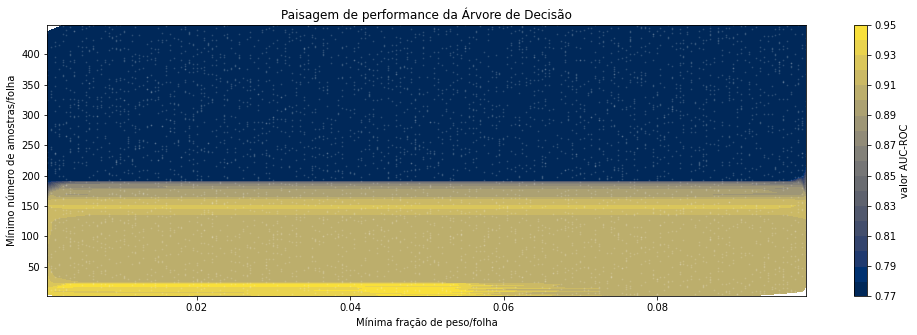

In [0]:
'''Código fonte para a imagem principal da aula'''

# Importando o que precisamos
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Carregando o conjunto de dados
entradas, saida = load_breast_cancer(return_X_y=True)

# Vamos passar o modelo preditivo, os dados de entrada e saida, a funcao de desempenho e o numero de particoes para a funcao de 
# validacao cruzada
desempenho_cross_val = cross_val_score(estimator = DecisionTreeClassifier(random_state=37),
                                       X = entradas, 
                                       y = saida,
                                       scoring = 'roc_auc',
                                       cv = 3)

print('Desempenho médio de AUC-ROC: {}'.format(round(desempenho_cross_val.mean(),3)))
# Importando o Random Search com cross-validation
from sklearn.model_selection import RandomizedSearchCV

# Definindo o Random Search CV. Vamos fornecer o argumento n_iter, que fala quantas configurações de hparams testar:
random_search_cv = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state = 37),
                              param_distributions = {'min_weight_fraction_leaf':[ix/2001 for ix in range(1,200)], 
                                            'min_samples_leaf':range(1,450)} , 
                              scoring='f1', 
                              cv = 3,
                              n_iter = 5000)

# Realizando a otimização por GridSearch para os dados de cancer de mama:
random_search_cv.fit(entradas,saida)

# Transpondo os dados para um DataFrame
import pandas as pd
import numpy as np
df = pd.DataFrame(random_search_cv.cv_results_).dropna()[['param_min_samples_leaf','param_min_weight_fraction_leaf','mean_test_score']].apply(lambda col: col.astype(np.float64))
df.info()

#Plotando o gráfico
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(17,5))

y = df['param_min_samples_leaf']
x = df['param_min_weight_fraction_leaf']
score = df['mean_test_score']

cntr = ax.tricontourf(x, y, score, levels=20, cmap="cividis")
ax.scatter(x, y, c= 'w',alpha=0.1,s=1)

fig.colorbar(cntr, ax=ax, label="valor AUC-ROC")

ax.set(
    xlim=(min(x), max(x)),
    ylim=(min(y), max(y)),
    xlabel="Mínima fração de peso/folha",
    ylabel="Mínimo número de amostras/folha",
)
ax.set_title('Paisagem de performance da Árvore de Decisão')

plt.show()

fig.savefig('/media/head.png')